In [2]:
from __future__ import print_function
from PIL import Image, ImageOps
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, AveragePooling2D
from keras import backend as K
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasRegressor
import csv

Using TensorFlow backend.


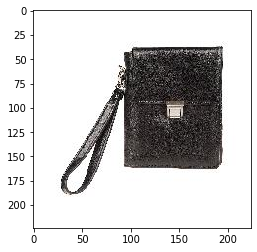

In [10]:
###Sample
im = Image.open('train/black/105186615.jpg')
plt.imshow(im)


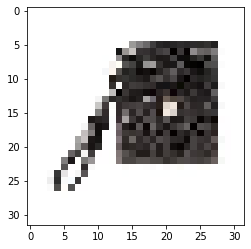

In [11]:
###Resize image to decrese the complexity
im = im.resize((32,32))
plt.imshow(im)


In [12]:
import os

###To increase Data for each sample we create 12 different sample 
###(4 type crop + rotate 90 + rotate -90 + mirror + flip + 4 type crop for fliped im) 
crop_size1=(5,5,32,32)
crop_size2=(0,0,27,27)
crop_size3=(0,5,27,32)
crop_size4=(5,0,32,27)
crop_size5=(5,5,27,27)

input_shape=(32, 32, 3)
X = np.ndarray(shape=(6239*12,32, 32, 3),dtype=np.float32)
Y = []
###12 color detection
color_list=['pink','purple','yellow','orange','white','silver','grey','black','red','brown','green','blue']
c=0
col = 0
for i in color_list:
    dic = "train/"+i+'/'
    print(dic)
    for filename in os.listdir(dic):
        if filename.endswith(".jpg"):            
            imf = Image.open(dic + filename)
            imf = imf.resize((32,32))
            np_imf = np.array(imf)
            X[c] = np_imf
            Y.append(col)
            ##flip image
            im = ImageOps.flip(imf)
            np_im = np.array(im)
            X[c+1] = np_im
            Y.append(col)
            ##Corp1
            im = imf.crop(crop_size1)
            im = im.resize((32,32))
            np_im = np.array(im)
            X[c+2] = np_im
            Y.append(col)
            ##Crop2
            im = imf.crop(crop_size2)
            im = im.resize((32,32))
            np_im = np.array(im)
            X[c+3] = np_im
            Y.append(col)
            ##Crop3
            im = imf.crop(crop_size3)
            im = im.resize((32,32))
            np_im = np.array(im)
            X[c+4] = np_im
            Y.append(col)
            ##crop4
            im = imf.crop(crop_size4)
            im = im.resize((32,32))
            np_im = np.array(im)
            X[c+5] = np_im
            Y.append(col) 
            ##crop5
            im = imf.crop(crop_size5)
            im = im.resize((32,32))
            np_im = np.array(im)
            X[c+6] = np_im
            Y.append(col)
            ##rotate90
            im = imf.rotate(90)
            np_im = np.array(im)
            X[c+7] = np_im
            Y.append(col)
            ##rotate-90
            im = imf.rotate(-90)
            np_im = np.array(im)
            X[c+8] = np_im
            Y.append(col)
            ##mirror
            im = ImageOps.mirror(imf)
            np_im = np.array(im)
            X[c+9] = np_im
            Y.append(col)
            ##flip
            imf = ImageOps.flip(imf)
            ##Corp1
            im = imf.crop(crop_size1)
            im = im.resize((32,32))
            np_im = np.array(im)
            X[c+10] = np_im
            Y.append(col)
            ##Crop2
            im = imf.crop(crop_size2)
            im = im.resize((32,32))
            np_im = np.array(im)
            X[c+11] = np_im
            Y.append(col)
            c+=12
    col += 1
# print(c)
# print(Y)

train/pink/
train/purple/
train/yellow/
train/orange/
train/white/
train/silver/
train/grey/
train/black/
train/red/
train/brown/
train/green/
train/blue/


In [14]:
X = X / 255
## split to train, test, validation test
X_trainn,X_test,Y_trainn,Y_test=train_test_split(X,Y,test_size=0.1)
X_train,VX_test,Y_train,VY_test=train_test_split(X_trainn,Y_trainn,test_size=0.05)

In [15]:

Y_train = keras.utils.to_categorical(Y_train, 12)
Y_test = keras.utils.to_categorical(Y_test, 12)
VY_test = keras.utils.to_categorical(VY_test, 12)

In [16]:

model = Sequential()
model.add(Conv2D(8, kernel_size=(7, 7),input_shape=input_shape))
model.add(Conv2D(16, kernel_size=(5, 5)))
# model.add(BatchNormalization(axis=3))
# model.add(Conv2D(64, kernel_size=(3, 3)))
# model.add(BatchNormalization(axis=3))
# model.add(Conv2D(128, kernel_size=(3, 3)))
# model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         1184      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 16)        3216      
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)             

In [17]:

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, Y_train,batch_size=100,epochs=20,verbose=1,validation_data=(X_test, Y_test))



Train on 64011 samples, validate on 7487 samples
Epoch 1/20
64011/64011 [==============================] - 42s 656us/step - loss: 1.9343 - accuracy: 0.3219 - val_loss: 1.4869 - val_accuracy: 0.4730
Epoch 2/20
64011/64011 [==============================] - 40s 631us/step - loss: 1.5128 - accuracy: 0.4696 - val_loss: 1.3798 - val_accuracy: 0.5083
Epoch 3/20
64011/64011 [==============================] - 41s 642us/step - loss: 1.4371 - accuracy: 0.5006 - val_loss: 1.3359 - val_accuracy: 0.5277
Epoch 4/20
64011/64011 [==============================] - 40s 622us/step - loss: 1.3702 - accuracy: 0.5302 - val_loss: 1.2191 - val_accuracy: 0.5920
Epoch 5/20
64011/64011 [==============================] - 48s 756us/step - loss: 1.1682 - accuracy: 0.6124 - val_loss: 1.0187 - val_accuracy: 0.6658
Epoch 6/20
64011/64011 [==============================] - 44s 684us/step - loss: 1.0534 - accuracy: 0.6540 - val_loss: 0.9281 - val_accuracy: 0.6851
Epoch 7/20
64011/64011 [==============================] 

In [18]:
score = model.evaluate(VX_test, VY_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8149574933844433
Test accuracy: 0.7207714915275574
